# Indian Unemployment & Employment Trend Analysis_Data_Cleaning

# Part 1 : Data Cleaning (Python – Pandas + NumPy)

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv(r"D:\All\Complete Data Analyst Project\Unemployment_Project\indian_unemployment_100k.csv")
df

,State,Year,Area,Gender,Sector,Unemployment_Rate,Employment_Rate,Labour_Participation_Rate
0,Goa,2024,Urban,Female,Manufacturing,8.32,62.57,59.83
1,Telangana,2015,Urban,Female,Manufacturing,10.20,47.67,73.82
2,Maharashtra,2023,Rural,Female,Services,12.82,41.46,72.11
3,Jharkhand,2016,Urban,Male,Manufacturing,8.20,51.12,60.16
4,Gujarat,2016,Urban,Male,Services,7.01,40.24,59.68
...,...,...,...,...,...,...,...,...
99995,Arunachal Pradesh,2019,Rural,Female,Agriculture,13.51,54.82,60.26
99996,Tamil Nadu,2016,Urban,Female,Agriculture,14.03,51.22,74.66
99997,Odisha,2024,Urban,Male,Manufacturing,6.76,63.59,59.20
99998,Odisha,2017,Rural,Male,Agriculture,5.31,49.87,60.66


# Basic Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      100000 non-null  object 
 1   Year                       100000 non-null  int64  
 2   Area                       100000 non-null  object 
 3   Gender                     100000 non-null  object 
 4   Sector                     100000 non-null  object 
 5   Unemployment_Rate          100000 non-null  float64
 6   Employment_Rate            100000 non-null  float64
 7   Labour_Participation_Rate  100000 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.1+ MB


In [11]:
df.isnull().sum() # Not Present Any Null Value in a dataframe

State                        0
Year                         0
Area                         0
Gender                       0
Sector                       0
Unemployment_Rate            0
Employment_Rate              0
Labour_Participation_Rate    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Most Important Think to get DataFrame Shape (100000 -> Rows,9 -> Columns)
df.shape 

(100000, 8)

In [14]:
df.columns # What kind of Columns Present in a DataFrame

Index(['State', 'Year', 'Area', 'Gender', 'Sector', 'Unemployment_Rate',
       'Employment_Rate', 'Labour_Participation_Rate'],
      dtype='object')

In [15]:
df.rename(columns = {'Sector' : 'Industry_Sector'}, inplace=True) # rename column name/s

# Advanced Cleaning

In [16]:
# Remove Duplicates
df = df.drop_duplicates()
df

,State,Year,Area,Gender,Industry_Sector,Unemployment_Rate,Employment_Rate,Labour_Participation_Rate
0,Goa,2024,Urban,Female,Manufacturing,8.32,62.57,59.83
1,Telangana,2015,Urban,Female,Manufacturing,10.20,47.67,73.82
2,Maharashtra,2023,Rural,Female,Services,12.82,41.46,72.11
3,Jharkhand,2016,Urban,Male,Manufacturing,8.20,51.12,60.16
4,Gujarat,2016,Urban,Male,Services,7.01,40.24,59.68
...,...,...,...,...,...,...,...,...
99995,Arunachal Pradesh,2019,Rural,Female,Agriculture,13.51,54.82,60.26
99996,Tamil Nadu,2016,Urban,Female,Agriculture,14.03,51.22,74.66
99997,Odisha,2024,Urban,Male,Manufacturing,6.76,63.59,59.20
99998,Odisha,2017,Rural,Male,Agriculture,5.31,49.87,60.66


In [17]:
# standardize text
text_cols = ["State","Area"]

for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.title()
    )
df[text_cols].head() # Top 5 Row with standardize text

,State,Area
0,Goa,Urban
1,Telangana,Urban
2,Maharashtra,Rural
3,Jharkhand,Urban
4,Gujarat,Urban


In [18]:
# fix invalid unemployment rate
rate_cols = [
    "Unemployment_Rate",
    "Employment_Rate",
    "Labour_Participation_Rate"
]

for col in rate_cols:
    df.loc[df[col] < 0, col] =  np.nan  

df[rate_cols].head(5)

,Unemployment_Rate,Employment_Rate,Labour_Participation_Rate
0,8.32,62.57,59.83
1,10.20,47.67,73.82
2,12.82,41.46,72.11
3,8.20,51.12,60.16
4,7.01,40.24,59.68


In [19]:
# fill missing values

rate_cols = [
    "Unemployment_Rate",
    "Employment_Rate",
    "Labour_Participation_Rate"
]

for col in rate_cols:
    df[col] = df[col].fillna(df[col].mean())

df[rate_cols].head(5)

,Unemployment_Rate,Employment_Rate,Labour_Participation_Rate
0,8.32,62.57,59.83
1,10.20,47.67,73.82
2,12.82,41.46,72.11
3,8.20,51.12,60.16
4,7.01,40.24,59.68


# Feature Engineering

In [20]:
df["Employment_Gap"] = 100 - df["Employment_Rate"]
df

,State,Year,Area,Gender,Industry_Sector,Unemployment_Rate,Employment_Rate,Labour_Participation_Rate,Employment_Gap
0,Goa,2024,Urban,Female,Manufacturing,8.32,62.57,59.83,37.43
1,Telangana,2015,Urban,Female,Manufacturing,10.20,47.67,73.82,52.33
2,Maharashtra,2023,Rural,Female,Services,12.82,41.46,72.11,58.54
3,Jharkhand,2016,Urban,Male,Manufacturing,8.20,51.12,60.16,48.88
4,Gujarat,2016,Urban,Male,Services,7.01,40.24,59.68,59.76
...,...,...,...,...,...,...,...,...,...
99995,Arunachal Pradesh,2019,Rural,Female,Agriculture,13.51,54.82,60.26,45.18
99996,Tamil Nadu,2016,Urban,Female,Agriculture,14.03,51.22,74.66,48.78
99997,Odisha,2024,Urban,Male,Manufacturing,6.76,63.59,59.20,36.41
99998,Odisha,2017,Rural,Male,Agriculture,5.31,49.87,60.66,50.13


# 📈 PART 2: Visualization (Matplotlib)

In [21]:
import matplotlib.pyplot as plt

# 1️⃣ Year-wise Unemployment Trend (LINE CHART)

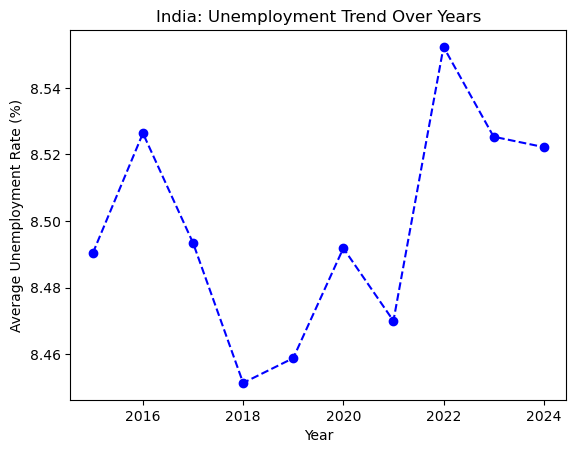

In [22]:
year_trean = df.groupby("Year")["Unemployment_Rate"].mean()

plt.figure()
plt.plot(year_trean, color='blue', linestyle='--', marker='o')
plt.xlabel("Year")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("India: Unemployment Trend Over Years")
plt.show()

# 2️⃣ Top 10 States by Unemployment (BAR CHART)

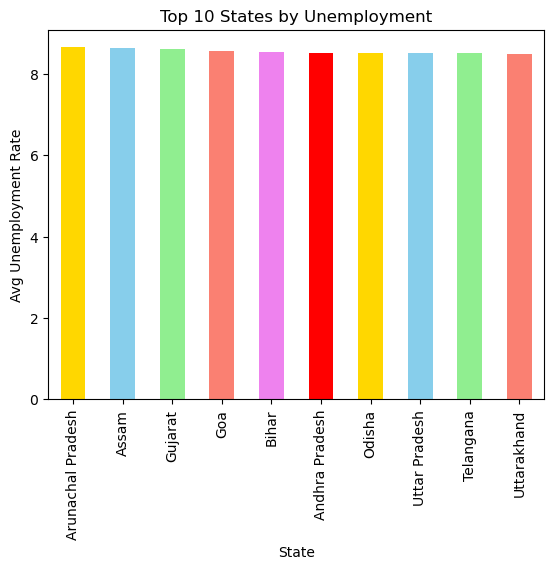

In [24]:
colors = ["gold", "skyblue", "lightgreen", "salmon", "violet","red"]
state_unemp = (
    df.groupby("State")["Unemployment_Rate"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
state_unemp.plot(kind="bar", color = colors[:len(state_unemp)])
plt.xlabel("State")
plt.ylabel("Avg Unemployment Rate")
plt.title("Top 10 States by Unemployment")
plt.show()

# 3️⃣ Rural vs Urban Comparison (BAR CHART)

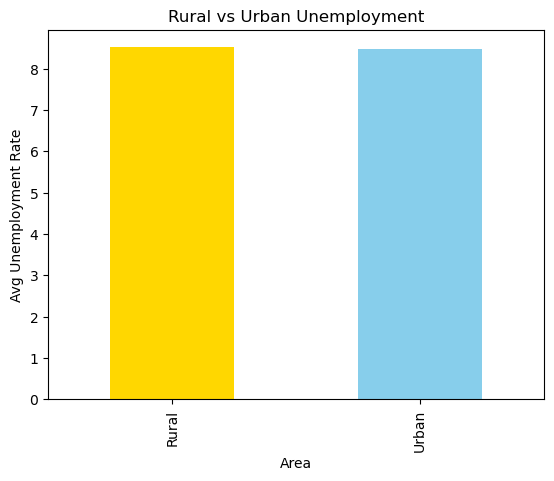

In [25]:
colors = ["gold", "skyblue", "lightgreen", "salmon", "violet","red"]
area_unemp  = (
    df.groupby("Area")["Unemployment_Rate"]
    .mean()
)

plt.figure()
area_unemp.plot(kind="bar", color = colors[:len(area_unemp)])
plt.xlabel("Area")
plt.ylabel("Avg Unemployment Rate")
plt.title("Rural vs Urban Unemployment")
plt.show()

# 4️⃣ Sector-wise Employment Distribution

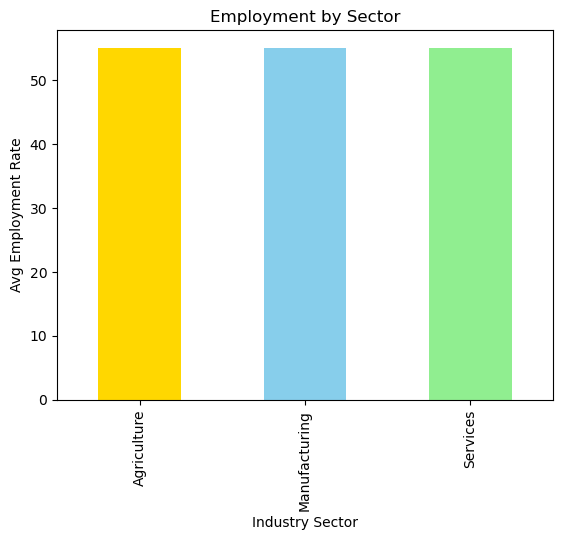

In [85]:
colors = ["gold", "skyblue", "lightgreen", "salmon", "violet"]
sector_emp = df.groupby("Industry_Sector")["Employment_Rate"].mean()

plt.figure()
sector_emp.plot(kind="bar",color = colors[:len(sector_emp)])
plt.xlabel("Industry Sector")
plt.ylabel("Avg Employment Rate")
plt.title("Employment by Sector")
plt.show()

# 5️⃣ Gender-wise Unemployment (BAR CHART)

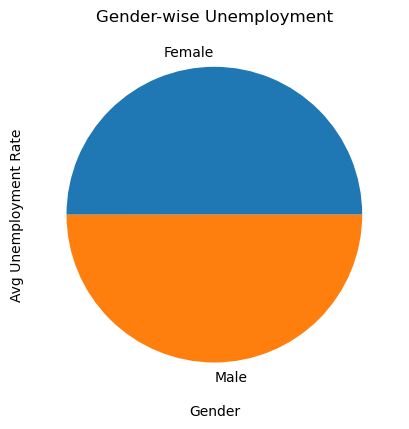

In [30]:
colors = ["gold", "skyblue", "lightgreen", "salmon", "violet","red"]
gender_unemp = df.groupby("Gender")["Unemployment_Rate"].mean()

plt.figure()
gender_unemp.plot(kind="pie" ,color = colors[:len(gender_unemp)])
plt.xlabel("Gender")
plt.ylabel("Avg Unemployment Rate")
plt.title("Gender-wise Unemployment")
plt.show()

In [35]:
df.to_csv(r"D:\All\Complete Data Analyst Project\Unemployment_Project.csv", index=False)